<a href="https://colab.research.google.com/github/Rubendiazolmo/BloquePID/blob/main/IdentificacionPID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Instalar módulos necesarios

In [1]:
!pip install scipy
!pip install control
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Subir archivo excel con los datos obtenidos en las pruebas

In [3]:
from google.colab import files
excel = files.upload()

Saving datos.xls to datos (1).xls


Importar todos los modulos/funciones necesarios.

In [4]:
# Importar módulos
from scipy.optimize import curve_fit
from scipy.signal import lti
from control.matlab import tf
from control.matlab import rlocus
from control import pole
from control import step_response
from control import feedback
from control import forced_response as lsim
import pandas as pd
from numpy import *
from matplotlib.pyplot import *
from time import time
import io

Definir funciones

In [16]:
# Función de transferencia de segundo tercer para identificación
def FdT(x,k,a,b,c,d):
    sol = lti(30*k,[a, b, c, d]).step(T=x)[1]-45
    return sol
 
# Función para integrar
def integrar(datos, integral, dt):
    i1 = dt * (datos[2] + datos[1]) / 2
    i2 = dt * ((datos[2]) + (2 * datos[1]) + datos[0]) / 4
    integral = integral + (4 * i1 - i2) / 3
    return integral

# Función para derivar
def derivar(datos, tiempo_muestreo):
    sol = ((3 * datos[0]) - (4 * datos[1]) + datos[2]) / (2 * tiempo_muestreo)
    return sol

# Función para borrar NaN
def quitarNaN(data):
    tmp = isnan(data)
    datos_filtrados = data
    for i in range(len(tmp)):

        if tmp[i] == False:
            pass
        else:
            datos_filtrados = data[0:i]
            break

    return datos_filtrados

Obtener los datos del excel importado

In [10]:
datos = pd.read_excel(io.BytesIO(excel['datos.xls']))
respuesta_ba = array(datos['Respuesta'])
tiempo = array(datos["Tiempo"])

tiempo = quitarNaN(tiempo)
respuesta_ba = quitarNaN(respuesta_ba)

Estimación de la función de transferencia del sistema

In [17]:
par1, _ = curve_fit(FdT, tiempo, respuesta_ba)
k, a, b, c, d = par1

fdt = tf(k,[a, b, c, d])
print(fdt)


                      0.01239
---------------------------------------------------
0.0005358 s^3 + 0.002414 s^2 + 0.008323 s + 0.01324



Comprobar estimación

1.357


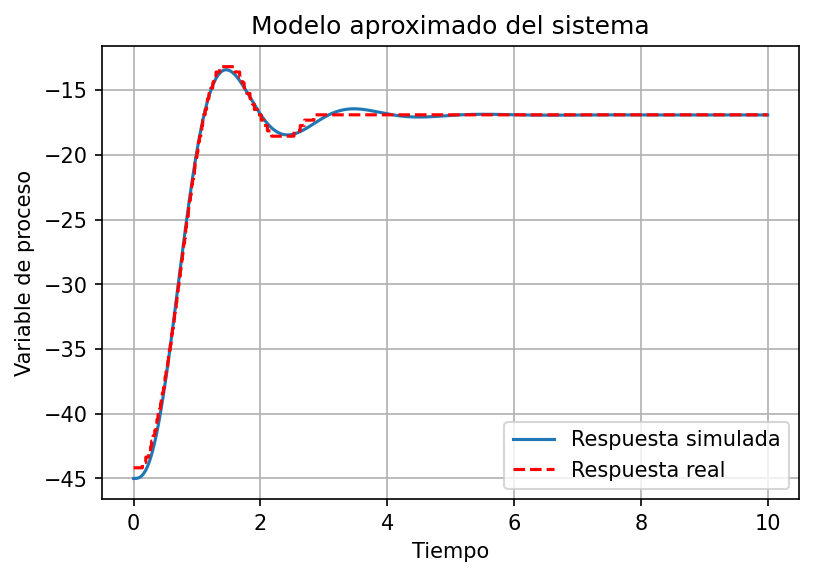

In [15]:
_,rsp = step_response(30*fdt-45,tiempo)
figure(dpi=150)
title('Modelo aproximado del sistema')
grid()
ylabel('Variable de proceso')
xlabel('Tiempo')
plot(tiempo,rsp, label='Respuesta simulada')
plot(tiempo,respuesta_ba, '--', color='red', label='Respuesta real')
legend()
for i in range(len(respuesta_ba)-1):
    if respuesta_ba[i] == max(respuesta_ba):
        print(tiempo[i])
        break